<a href="https://colab.research.google.com/github/AndiswaNyo/Projects/blob/main/CNN_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detection of Pneumonia Using CNN**

Data source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

**Why is the dataset suitable for CNN and tensorflow?**

A Convolutional Neural Network (CNN) is a specialized type of deep learning model that excels at processing image data. Its architecture mimics the human visual system, using convolutional layers to extract spatial hierarchies of features such as edges, shapes and textures from images. These extracted features are then passed through pooling layers, fully connected layers and an output layer to classify or predict based on the given data. They are used for tasks like object detection, image recognition and.
The dataset pneumonia dataset is ideal for CNNs because it is composed of structured and labeled images, which allows CNNs to effectively extract and learn hierarchical spatial patterns The dataset is suitable for use with TensorFlow because TensorFlow is a highly flexible and powerful deep learning framework designed specifically to handle tasks like image classification using CNNs. TensorFlow offers built-in support for key functionalities required for working with image data, such as preprocessing, model building and training, making it seamless to integrate datasets with images.
Rizvi M,S,Z. (2024). Image Classification Using CNN. (Analytics Vidhya.)  

Available: https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/



# **What analysis will be performed**

**Exploratory Analysis and Data Wrangling**

The analysis begins with exploratory data analysis (EDA) to understand the dataset. This includes verifying the structure of the dataset, identifying the number of classes (e.g., "Normal" vs. "Pneumonia"), and ensuring there are no missing or corrupt images. The distribution of data across these classes will be examined using bar charts or pie charts to identify any imbalances. Preprocessing steps such as resizing images to a uniform size and normalizing pixel values will be applied to prepare the data for the CNN. If class imbalances are observed, techniques like oversampling, undersampling, or data augmentation will be used to ensure the model is trained on a balanced dataset.

**Explanation of Tables and Graphs**

During training, key metrics such as training accuracy, validation accuracy, training loss and validation loss will be tracked and plotted across epochs. These graphs will help visualize the model's learning process and detect issues like overfitting (if validation loss increases while training loss decreases) or underfitting (if both losses remain high). Additionally, a confusion matrix will be generated post-training to understand the model's performance in terms of true positives, false positives, true negatives, and false negatives. This table will be used to calculate and interpret precision, recall, and F1-score, providing deeper insight into how well the model distinguishes between the classes.

**Handling Overfitting and Underfitting**

To address overfitting, techniques such as dropout, early stopping, and L2 regularization will be applied to reduce the model's complexity and improve generalization. If underfitting is observed, the model architecture may be adjusted to include more layers or neurons, or the training duration may be extended to allow the model to better learn patterns in the data.

**Hyperparameter Tuning**

Hyperparameter optimization will be performed to fine-tune parameters such as learning rate, batch size, number of epochs, and the number of filters or layers in the CNN. This may be done using grid search, random search or more advanced methods like Bayesian optimization  to find the optimal combination of parameters that maximizes the model's performance on the validation set while minimizing overfitting.

**Interpreting Model Results**

The results of the model will be analyzed using metrics such as accuracy, precision, recall, and F1-score. The confusion matrix will help identify whether the model struggles with specific types of errors, such as false positives or false negatives. For instance, in medical diagnostics, minimizing false negatives (i.e., undiagnosed cases of pneumonia) is critical. The impact of hyperparameter tuning will be evaluated by comparing model performance before and after tuning. Trends in the validation metrics will provide insights into the model's generalization capability.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:17<00:00, 31.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
df = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2'

Step 1: Verify Dataset Structure
We will inspect the contents of the directory to understand its structure.

In [ ]:

pip install scikeras


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from scikeras.wrappers import KerasClassifier

# **Exploratory Data Analysis**


EDA is conducted to understand the balance of your classes. If classes are imbalanced, the CNN might struggle with the
minority classes. Techniques like data augmentation or weighted loss functions can help address this.

Image Counts in Each Set:
            NORMAL  PNEUMONIA
Train         1341       3875
Validation       8          8
Test           234        390


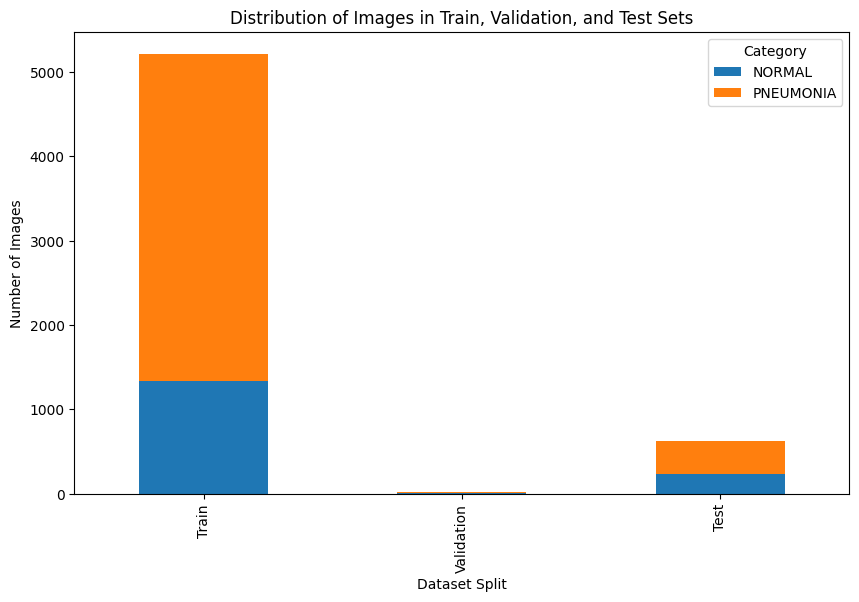

Sample images - NORMAL (Training Set)


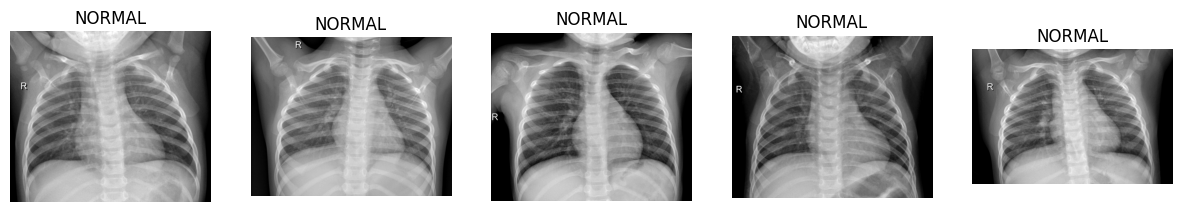

Sample images - PNEUMONIA (Training Set)


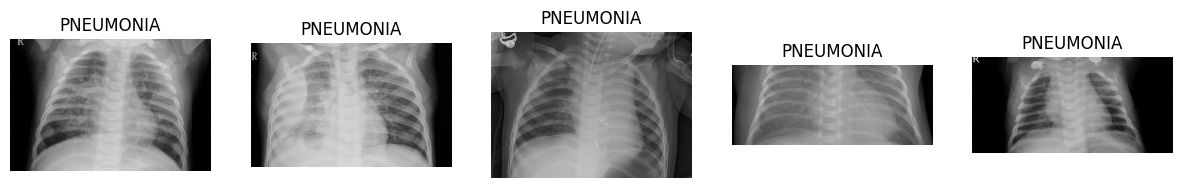


Image Dimensions (Training Set):
             Width       Height
count  5216.000000  5216.000000
mean   1320.610813   968.074770
std     355.298743   378.855691
min     384.000000   127.000000
25%    1056.000000   688.000000
50%    1284.000000   888.000000
75%    1552.000000  1187.750000
max    2916.000000  2663.000000


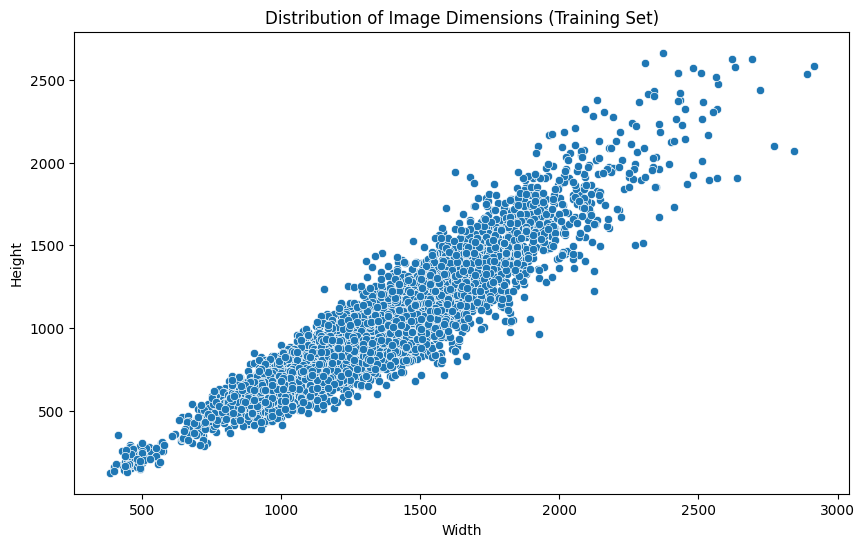

In [ ]:


# Define the path to the dataset
data_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray'

# Define paths for training, validation, and test sets
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Categories (Assumed structure based on typical chest X-ray pneumonia datasets)
categories = ['NORMAL', 'PNEUMONIA']

# Function to count images in each category
def count_images_in_dir(directory):
    counts = {}
    for category in categories:
        category_dir = os.path.join(directory, category)
        counts[category] = len(os.listdir(category_dir))
    return counts

# Count images in each category for train, validation, and test sets
train_counts = count_images_in_dir(train_dir)
val_counts = count_images_in_dir(val_dir)
test_counts = count_images_in_dir(test_dir)

# Display counts in a DataFrame for better visualization
counts_df = pd.DataFrame([train_counts, val_counts, test_counts], index=['Train', 'Validation', 'Test'])
print("Image Counts in Each Set:")
print(counts_df)

# Visualize distribution of images across categories
counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Images in Train, Validation, and Test Sets')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.legend(title="Category")
plt.show()

# Display a few sample images from each category
def display_sample_images(category, dataset_dir, num_images=5):
    category_path = os.path.join(dataset_dir, category)
    images = os.listdir(category_path)[:num_images]  # Get the first `num_images` files
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{category}')
        plt.axis('off')
    plt.show()

# Display sample images from both categories in the training set
for category in categories:
    print(f"Sample images - {category} (Training Set)")
    display_sample_images(category, train_dir)

# Analyze image dimensions (aspect ratio consistency)
from PIL import Image
image_dimensions = []

# Function to get image dimensions
def get_image_dimensions(directory):
    for category in categories:
        category_dir = os.path.join(directory, category)
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = Image.open(img_path)
            image_dimensions.append(img.size)

# Get dimensions for training set images
get_image_dimensions(train_dir)

# Convert dimensions to DataFrame and analyze
dimensions_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])
print("\nImage Dimensions (Training Set):")
print(dimensions_df.describe())

# Plot a scatter plot of image dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Height', data=dimensions_df)
plt.title('Distribution of Image Dimensions (Training Set)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()



# **EDA Results**

The dataset has data in three catergories, training dataset, validation dataset and test dataset.  

Bar chart - IMage distribution

Image Distribution (Bar Plot):
The first chart shows the distribution of images in the training, validation, and test sets.

Train Set:

Contains a significantly larger number of images compared to the validation and test sets.
This is typical, as training datasets generally need more data to allow the model to learn effectively.
Categories:
NORMAL: Approximately 1,341 images.
PNEUMONIA: Approximately 3,875 images.
Observation: There is a class imbalance (more PNEUMONIA images than NORMAL), which may bias the model during training.

Validation and Test Sets:

Both contain significantly fewer images, which is okay.
Each class seems to have almost equal distributions across validation and test sets.

Sample Images (NORMAL and PNEUMONIA):
The second set of images displays sample X-ray images for both NORMAL and PNEUMONIA categories from the training set.

NORMAL:

These images show clear lungs without visible signs of infection.
The lung fields appear symmetric with no obvious opacities.
PNEUMONIA:

These images display varying degrees of lung opacities, typical of pneumonia.
Such opacities often indicate fluid or inflammation in the lungs.
Observation: The images seem to be grayscale and of good quality, which is important for building robust machine learning models. However, preprocessing steps like resizing to a consistent dimension may be necessary.

Image Dimensions (Scatter Plot and Statistics):
The scatter plot and summary statistics provide insights into the dimensions of images in the training set.

Scatter Plot:

The plot shows a positive correlation between width and height, indicating most images have consistent aspect ratios.
There is some variation in image sizes. No extreme outliers are visible.
Statistics:

Mean width: ~1,320 pixels.
Mean height: ~968 pixels.
Minimum width: 384 pixels; maximum width: 2,916 pixels.
Minimum height: 127 pixels; maximum height: 2,663 pixels.

Observation from images:

Images have varying resolutions, so resizing them to a consistent dimension (e.g., 224x224 or 128x128) is crucial for training machine learning models. This causes uniform input size for the model.


# **Training, Testing and Validation of the CNN model**

**Defining the paths**

1. train_dir: Specifies the directory for the training data used to train the
   model, adjusting its parameters to best fit this dataset.
2. val_dir: Points to the validation data used to evaluate and monitor the
   model's performance during training to detect overfitting and tune hyperparameters.
3. test_dir: Directs to the test data, which is used to assess the model's  
   final performance on new, unseen data to ensure it generalizes well.









In [ ]:
train_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train'
val_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val'
test_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test'

**Training**

 Setting up and training a Convolutional Neural Network (CNN) using TensorFlow and Keras for a binary classification task on chest X-ray images to distinguish between normal and pneumonia cases.

In [ ]:
# Define paths
train_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train'
val_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val'
test_dir = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test'

# Define parameters
#sets the target size for images, resizing them to 128x128 pixels to ensure uniformity and faster processing. This is done to ensure that images are in a consistent formate which is 128x128
#pixels so that the imodel can learn effectively without being biased by varying image sizes. Resizing is also done to reduce processing time.
IMG_SIZE = (128, 128)
#sets the number of samples per batch to 32, controlling the number of images that go through the network at once during training.This is being done to manage the memory
#so that it could be feasible to train even on hardware with limited memory.
BATCH_SIZE = 32

# Load datasets
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

'''The  image_dataset_from_directory function automatically processes the images by resizing them to the specified IMG_SIZE (128x128 pixels),
groups them into batches of BATCH_SIZE (32 images per batch), and sets label_mode to 'binary', indicating that labels
are to be treated as binary (0 or 1), which is appropriate for a two-class classification task. This step prepares
 the data for efficient input into a neural network, ensuring all images are uniformly processed and ready for training.'''
val_ds = image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

'''The image_dataset_from_directory function is being used to load and preprocess the validation dataset from the
specified directory (val_dir). The purpose of preparing the validation dataset in this way is to use it to monitor
the model's performance on unseen data during training, providing insights into how well the model generalizes
beyond the training examples, and to tune the hyperparameters or make early stopping decisions to prevent overfitting'''
test_ds = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

# Define the CNN model
'''This code defines a convolutional neural network (CNN) for binary classification using TensorFlow's
Keras API. It features layers that perform convolution and max pooling to extract and downsample features
from input images, followed by a flattening layer that prepares data for dense layers. A dropout layer is
included to prevent overfitting by randomly dropping units during training. The model concludes with a
sigmoid-activated dense layer that outputs a probability, indicating whether an image belongs to one of
two classes (e.g., pneumonia or normal). automatically detect important features and max pooling layers
to reduce data dimensions and complexity. A dropout layer is incorporated to prevent overfitting by randomly
disabling neurons during training, enhancing the model's ability to generalize. The final dense layer with
sigmoid activation outputs a probability, serving as a binary classifier for distinguishing between classes
like normal and pneumonia in chest X-rays.'''
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
EPOCHS = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.7671 - loss: 11.1916 - val_accuracy: 0.8750 - val_loss: 0.2720
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9181 - loss: 0.1913 - val_accuracy: 0.7500 - val_loss: 0.6043
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9567 - loss: 0.1414 - val_accuracy: 0.7500 - val_loss: 0.2922
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9577 - loss: 0.1295 - val_accuracy: 0.8125 - val_loss: 0.3547
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9673 - loss: 0.1084 - val_accuracy: 0.9375 - val_loss: 0.2238
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9638 - loss: 0.1079 - val_accuracy: 0.6875 - val_loss: 0.9344
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9745 - loss: 0.0876 - val_accuracy: 0.6875 - val_loss: 0.5590
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9778 - loss: 0.0719 - val_acc

# **Interpretation of results**

**Model sequential**

The model summary table provides a detailed breakdown of the architecture and parameterization of a convolutional neural network (CNN) designed for binary classification. Starting with a Conv2D layer with 32 filters, the model progressively deepens with additional convolutional layers using 64 and then 128 filters, each followed by a MaxPooling2D layer that reduces the spatial dimensions by half. The output from the convolutional stages is flattened into a vector with 14,400 elements, which is then processed by a dense layer with 128 neurons, resulting in a total of 304,769 parameters at this stage. This number of parameters reflects the model’s capacity to learn complex features from the input data. After the dense layers, a dropout layer with a rate of 0.5 helps mitigate overfitting by randomly dropping half of the neuron connections during training. The final output is handled by a single neuron with a sigmoid activation function, which outputs a probability score for the binary classification, indicating the model's predictive conclusion based on learned image features. The structure and parameter count suggest a moderately sized network capable of handling detailed image analysis, tailored to effectively manage the complexity inherent in tasks like medical image classification.

**Model Parameters**

Total params

Total params (3,211,392)  indicates the total number of trainable parameters in the model. These parameters are the weights and biases in various layers that the model adjusts during training. The memory size of these parameters is approximately 12.61 megabytes, indicating  a moderately large model capable of complex feature learning.

Trainable params

Trainable params(3,211,392) reflects that all the parameters in the model are trainable, which means they are updated during the backpropagation process.

Non-trainable params

Non-trainable params: 0 (0.00 B): There are no frozen or non-trainable parameters in this model.


**Training Progress (Epoch-wise Performance):**

Epoch 1: Starts with a training accuracy of 76.71% and a high loss of 11.1916.5043, but achieves a validation accuracy of 87.50% with a much lower validation loss of 0.270. The significant loss reduction and high validation accuracy indicates initial rapid learning or possible overfitting on the validation set.

Epoch 2-6: Shows significant improvement in training accuracy, reaching up to 97.78% by the sixth epoch. owever, validation accuracy fluctuates across the epochs, peaking at 93.75% in epoch 5 but decreasing and stabilizing around 75.00%-81.25% in later epochs. These fluctuations highlight the challenge in generalization, where the model fits well to the training data but struggles with unseen validation data.

Loss Metrics: Training loss consistently decreases, showing that the model is learning and improving its predictions on the training data. However, validation loss does not show a steady decrease and fluctuates, echoing the challenges in model generalization.

The disparity between training and validation metrics indicates that the model might be overfitting the training data, evidenced by high training accuracy and lower training loss compared to higher validation loss and lower validation accuracy.
This could be addressed by introducing regularization techniques.


# Plot training and validation accuracy and loss

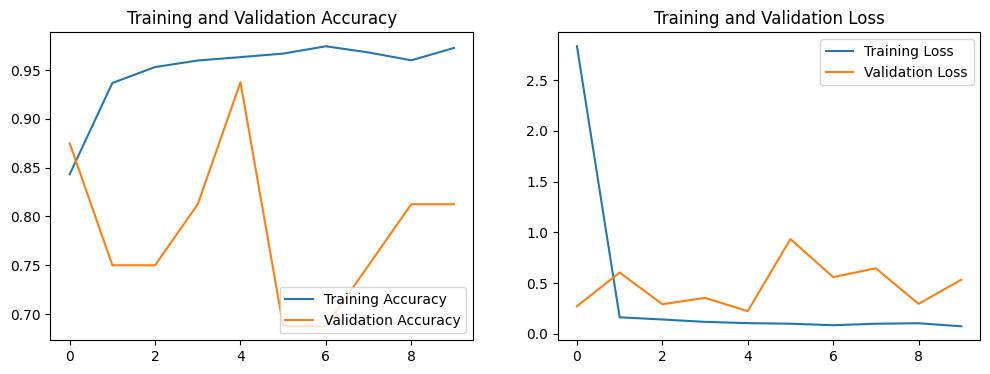

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 490ms/step - accuracy: 0.7513 - loss: 1.4719

Test Loss: 1.3847750425338745
Test Accuracy: 0.7516025900840759
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


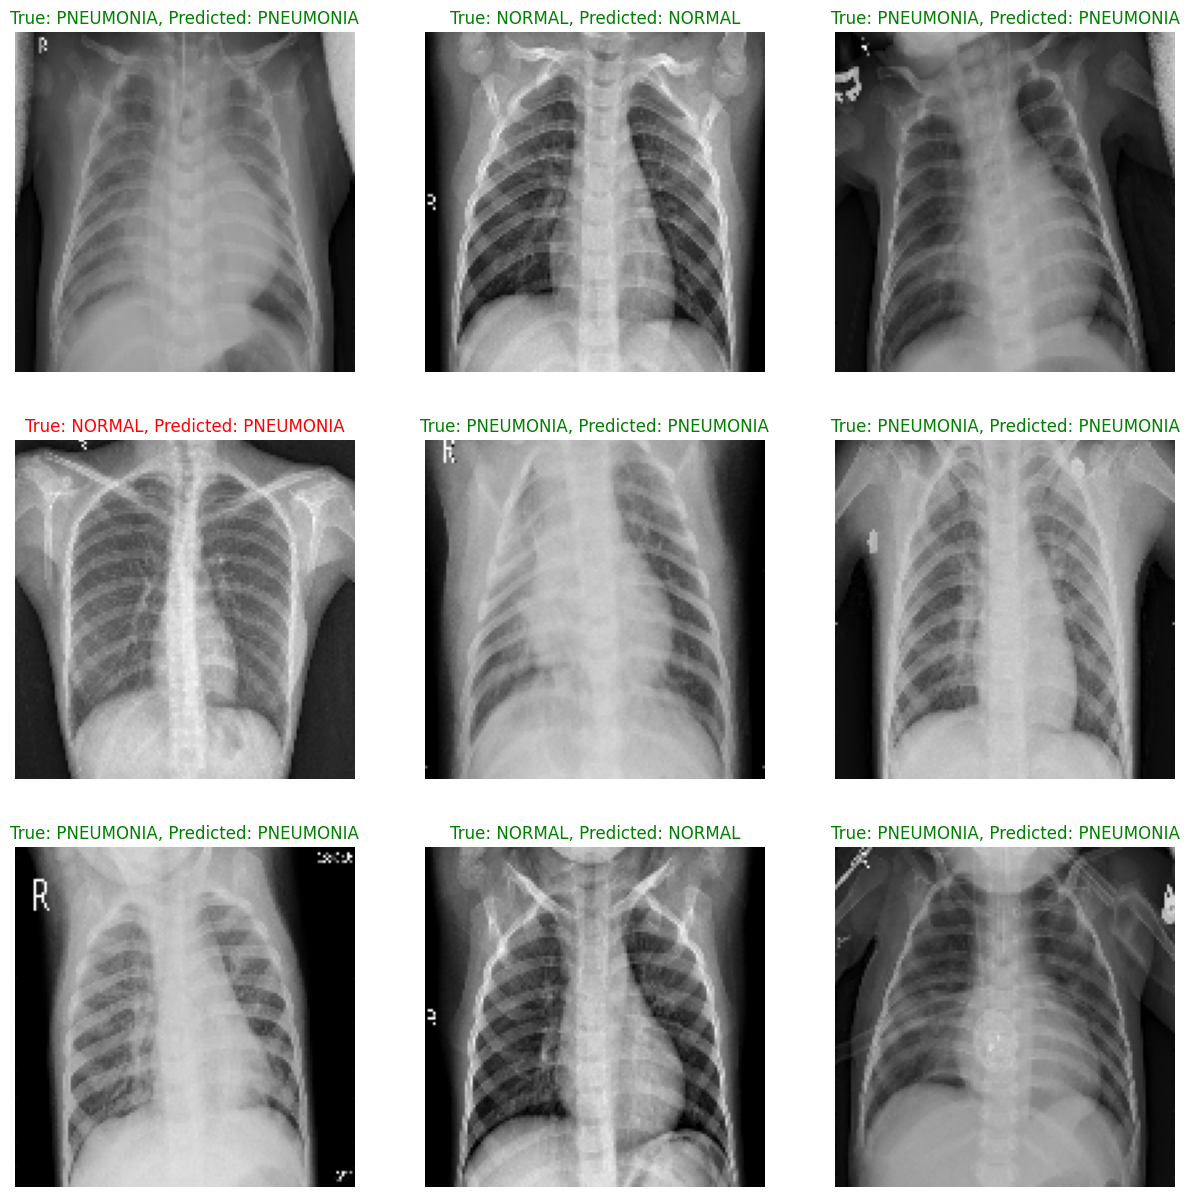

In [ ]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on test images and visualize some results
class_names = ["NORMAL", "PNEUMONIA"]

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = int(labels[i])
        predicted_label = 1 if predictions[i] > 0.5 else 0
        title_color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}", color=title_color)
        plt.axis("off")
plt.show()

**Training and Validation Accuracy**

The training accuracy steadily increases and approaches close to 1.0 (100%), indicating that the model is fitting well to the training data. The validation accuracy, however, shows significant fluctuations across epochs. It starts relatively low, dips further, then recovers slightly, but remains considerably lower than the training accuracy. The gap between training and validation accuracy and the fluctuation in validation accuracy indicates that the model maybe overfitting the training data. It learns the training data very well but struggles to generalize to the validation set.

**Training and Validation Loss**

The training loss decreases consistently, indicating that the model is optimizing well on the training set. The validation loss also decreases initially but fluctuates slightly and remains higher than the training loss throughout.
The decreasing training loss shows the model is effectively minimizing errors on the training data.

**Test Metrics**

The test accuracy of approximately 75.1% indicates slightly good performance on unseen data, which is lower than the training accuracy. The test loss value aligns with the validation loss, showing consistency between the validation and test results

**Visualization**

The results shows the performance of the CNN model applied to a pneumonia classification task using chest X-ray images. The images are labeled with the true condition ("PNEUMONIA" or "NORMAL") and the corresponding predictions made by the model. Predictions are displayed in green when correct and red when incorrect, allowing for a straightforward assessment of the model's strengths and weaknesses. From the grid, it is evident that the model successfully classifies most images, particularly distinguishing pneumonia cases with a high degree of accuracy. However, the presence of red-labeled predictions (e.g., "True: PNEUMONIA, Predicted: NORMAL") indicates areas where the model misclassifies cases, suggesting potential limitations in its generalization or sensitivity to subtle variations in X-rays.


Confusion matrix

The confusion matrix helps to evaluate the model by showing:

True Positives (TP): Correctly predicted "PNEUMONIA" cases.
True Negatives (TN): Correctly predicted "NORMAL" cases.
False Positives (FP): "NORMAL" misclassified as "PNEUMONIA."
False Negatives (FN): "PNEUMONIA" misclassified as "NORMAL."



20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step


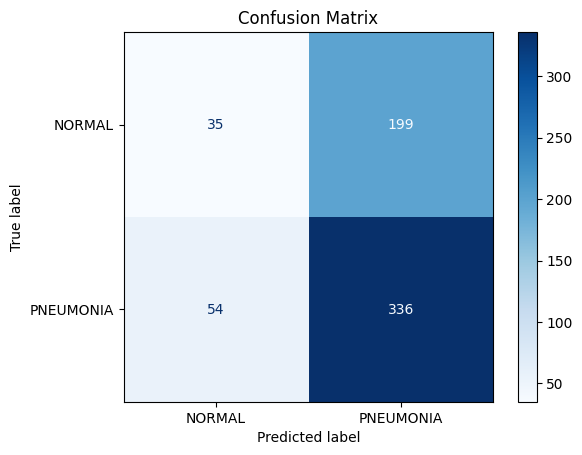

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
y_pred = (model.predict(test_ds) > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


True NORMAL

35 images were correctly classified as NORMAL (True Negatives).

199 images were incorrectly classified as PNEUMONIA (False Positives).

True PNEUMONIA

336 images were correctly classified as PNEUMONIA (True Positives).

54 images were incorrectly classified as NORMAL (False Negatives).

In [ ]:
# Confusion matrix values
true_normal = 35  # True Negatives
false_positive = 199  # False Positives
false_negative = 54  # False Negatives
true_pneumonia = 336  # True Positives

# Total correct predictions
correct_predictions = true_normal + true_pneumonia

# Total samples
total_samples = true_normal + false_positive + false_negative + true_pneumonia

# Accuracy
accuracy = correct_predictions / total_samples * 100
print(f"Accuracy: {accuracy:.2f}%")

# Precision (PNEUMONIA)
precision_pneumonia = true_pneumonia / (true_pneumonia + false_positive)
print(f"Precision (PNEUMONIA): {precision_pneumonia * 100:.2f}%")

# Recall (PNEUMONIA)
recall_pneumonia = true_pneumonia / (true_pneumonia + false_negative)
print(f"Recall (PNEUMONIA): {recall_pneumonia * 100:.2f}%")

# F1-Score (PNEUMONIA)
f1_score_pneumonia = 2 * (precision_pneumonia * recall_pneumonia) / (precision_pneumonia + recall_pneumonia)
print(f"F1-Score (PNEUMONIA): {f1_score_pneumonia * 100:.2f}%")


Accuracy: 59.46%
Precision (PNEUMONIA): 62.80%
Recall (PNEUMONIA): 86.15%
F1-Score (PNEUMONIA): 72.65%


**Confusion matrix results**


The performance metrics for the model indicate a moderate level of accuracy (59.46%), which reflects the overall percentage of correctly classified samples. The precision for detecting pneumonia is 62.80%, meaning that out of all the samples predicted as pneumonia, 62.80% were correct, highlighting the model's tendency to avoid false positives. The recall for pneumonia is higher at 86.15%, indicating that the model successfully identified 86.15% of all true pneumonia cases, showcasing its effectiveness in minimizing false negatives. The F1-score, which balances precision and recall, is 72.65%, indicating that the model performs reasonably well in identifying pneumonia cases, but there is room for improvement in both precision and recall to enhance its overall reliability.